<a href="https://colab.research.google.com/github/navin51495/Numerical-methods/blob/master/Naive_Bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
from google.colab import files
uploaded=files.upload()
train=pd.read_csv('data2.csv')

Saving data2.csv to data2.csv


In [103]:
X=train[["P1","P9"]]
y=train["P23"]
#y=train["P23"].to_numpy()

In [ ]:
for i in range(0,len(y)):
  if(y[i]<40):
    y[i]=0
  else:
    y[i]=1

In [102]:
#y

In [104]:
clf1=GaussianNB()
#clf1 = DecisionTreeClassifier(max_depth=4)
#clf1 = KNeighborsClassifier(n_neighbors=2)
clf1.fit(X,y)

GaussianNB()

In [105]:
predict_train = clf1.predict(X)
probab=clf1.predict_proba(X)

In [101]:
#predict_train

In [106]:
accuracy_train=accuracy_score(y,predict_train)
print(accuracy_train)

0.8571428571428571


#Plotting probabilities

In [107]:
def make_meshgrid(x, y, h=0.1):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min()-0.1, y.max() + 0.1
    print(x_min,x_max)
    print(y_min,y_max)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [17]:

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [109]:
X0=X['P1'].to_numpy() #Secondary hole diameter
X1=X['P9'].to_numpy() #Swirl number
#X2=X['P3'].to_numpy() #Dilution hole diameter
xx, yy = make_meshgrid(X0, X1)
xx

4.0 16.0
0.5 2.1


array([[ 4. ,  4.1,  4.2, ..., 15.7, 15.8, 15.9],
       [ 4. ,  4.1,  4.2, ..., 15.7, 15.8, 15.9],
       [ 4. ,  4.1,  4.2, ..., 15.7, 15.8, 15.9],
       ...,
       [ 4. ,  4.1,  4.2, ..., 15.7, 15.8, 15.9],
       [ 4. ,  4.1,  4.2, ..., 15.7, 15.8, 15.9],
       [ 4. ,  4.1,  4.2, ..., 15.7, 15.8, 15.9]])

In [142]:
#zz=xx.copy()
#zz[:]=20
Z = clf1.predict_proba(np.c_[xx.ravel(), yy.ravel()])
df = pd.DataFrame(Z, columns = ['NC','C'])
Z=df['C'].to_numpy()
zz = Z.reshape(xx.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


Text(0, 0.5, 'Secondary hole diameter')

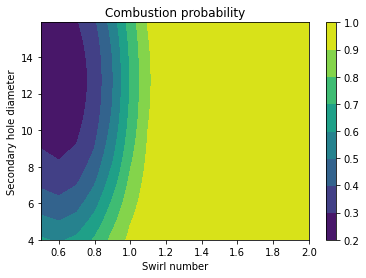

In [155]:
fig,ax=plt.subplots(1,1)
cp=ax.contourf(yy,xx,zz)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Combustion probability')
ax.set_xlabel('Swirl number')
ax.set_ylabel('Secondary hole diameter')